In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [11]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


In [12]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [16]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [17]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history=model.fit(X_train,y_train,batch_size=64,epochs=2,validation_data=(X_test,y_test))

Epoch 1/2
491/491 [==============================] - 103s 205ms/step - loss: 2.3856 - accuracy: 0.4155 - val_loss: 0.8941 - val_accuracy: 0.7555
Epoch 2/2
491/491 [==============================] - 103s 209ms/step - loss: 1.0282 - accuracy: 0.6992 - val_loss: 0.4126 - val_accuracy: 0.9040


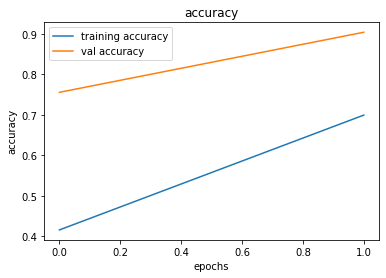

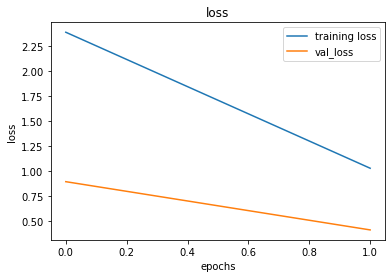

In [19]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [22]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test=pd.read_csv('Test.csv')

labels=y_test["ClassId"].values
imgs=y_test["Path"].values

data=[]

for img in imgs:
    image=Image.open(img)
    image=image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)
pred=model.predict(X_test)
pred=np.argmax(pred,axis=1)

print(accuracy_score(labels,pred))
model.save('traffic_classifier.h5')

395/395 [==============================] - 12s 30ms/step
0.8667458432304038
